# Integração Numérica: Quadratura Gaussiana

Uma característica das fórmulas de Newton-Cotes é estimar a integral com base em valores da função tomados em nós igualmente espaçados. Consequentemente, a posição desses nós é predeterminada, isto é, fixada.

Agora, suponhamos que a restrição de ter nós fixados seja removida e que pudéssemos escolher arbitrariamente as posições por eles ocupadas. Com uma escolha adequada, será que conseguiríamos reduzir o erro de integração? 

De fato, o método da Quadratura Gaussiana permite-nos estabelecer um conjunto mínimo de *nós* e *pesos* que realizam uma espécie de "balanceamento" do erro (subestimação vs. superestimação) e determinam aproximações numéricas de integrais com alta ordem.

As figuras abaixo mostram, por exemplo, como a integral de uma função $f(x)$ é melhor calculada através da colocação de pontos em posições "especiais". A regra do trapézio é posta em contraste com uma outra regra, que aprenderemos, cujo par de pontos, embora defina também um trapézio, ajuda a estimar melhor a integral de $f(x)$ do que o observado no primeiro caso. 

Em particular, daremos enfoque à chamada *Quadratura de Gauss-Legendre*.

In [2]:
import matplotlib.pyplot as plt
import numpy.polynomial.legendre as leg
import numpy as np

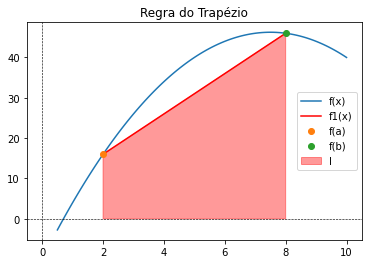

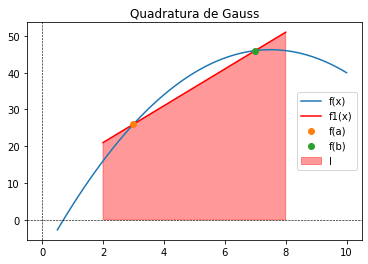

In [3]:
def f(x):
    return -x**2 + 15*x - 10

x = np.linspace(0.5,10,100)
y = f(x)

# Representação geométrica da regra do trapézio

plt.figure()
plt.plot(x,y, label = 'f(x)')
plt.plot([2,8], [f(2),f(8)], 'r', label = 'f1(x)')
plt.plot(2,f(2), 'o', label = 'f(a)')
plt.plot(8,f(8), 'o', label = 'f(b)')
plt.fill([2, 2, 8, 8],[0, f(2), f(8), 0],color='r',alpha=0.4, label = 'I')
plt.title('Regra do Trapézio')
plt.legend()
plt.axvline(x=0,color='k',linewidth=0.6,linestyle='--')
plt.axhline(y=0,color='k',linewidth=0.6,linestyle='--')

# Representação geométrica da quadratura de Gauss

def f1(x):
    return 5.0*x + 11.0

plt.figure()
plt.plot(x,y, label = 'f(x)')
plt.plot([2,8], [f1(2),f1(8)], 'r', label = 'f1(x)')
plt.plot(3,f(3), 'o', label = 'f(a)')
plt.plot(7,f(7), 'o', label = 'f(b)')
plt.fill([2, 2, 8, 8],[0, f1(2), f1(8), 0],color='r',alpha=0.4, label = 'I')
plt.title('Quadratura de Gauss')
plt.legend()
plt.axvline(x=0,color='k',linewidth=0.6,linestyle='--')
plt.axhline(y=0,color='k',linewidth=0.6,linestyle='--');

## Dedução da Fórmula de Gauss-Legendre para Dois Pontos

O objetivo da quadratura de Gauss-Legendre é determinar os coeficientes de uma equação da forma

$$
I \cong c_0 f(x_0) + c_1 f(x_1) \qquad (1)
$$

em que os $c$’s são coeficientes desconhecidos. Entretanto, em contraste com a regra do trapézio que usa extremidades fixas $a$ e $b$, os argumentos da função $x_0$ e $x_1$ não são fixados nas extremidades, mas são incógnitas. Assim, agora temos um total de quatro incógnitas que devem ser calculadas e necessitamos de quatro condições para determiná-las exatamente.

Podemos obter duas dessas condições, supondo que a Equação (1) calcula a integral de uma função constante e de uma função linear exatamente. Então, para chegar a duas outras condições, simplesmente estendemos esse raciocínio supondo que ele também calculará a integral de uma função parabólica ($y = x^2$) e de uma cúbica ($y = x^3$) exatamente. Fazendo isso, determinamos todas as quatro incógnitas e, de quebra, deduzimos uma fórmula de integração linear de dois pontos que é exata para funções cúbicas. As quatro equações a serem resolvidas são:

$$
c_0 f(x_0) + c_1 f(x_1) = \int _{-1}^{1} 1 dx = 2 \qquad (2) \\
c_0 f(x_0) + c_1 f(x_1) = \int _{-1}^{1} x dx = 0 \qquad (3) \\
c_0 f(x_0) + c_1 f(x_1) = \int _{-1}^{1} x^2 dx = \dfrac{2}{3} \qquad (4) \\
c_0 f(x_0) + c_1 f(x_1) = \int _{-1}^{1} x^3 dx = 0 \qquad (5)
$$

As Equações (2) até (5) podem ser resolvidas simultaneamente por

$$
c_0 = c_1 = 1 \\
x_0 = -\dfrac{1}{\sqrt{3}} \\
x_1 = \dfrac{1}{\sqrt{3}}
$$

o que pode ser substituído na Equação (1) para fornecer a fórmula de Gauss-Legendre de dois pontos

$$
I \cong f \left( \dfrac{-1}{\sqrt{3}} \right) + f \left( \dfrac{1}{\sqrt{3}} \right) \qquad (6)
$$

Logo, chegamos ao interessante resultado que uma simples adição de valores da função em $x = 1/\sqrt{3}$ e $−1/\sqrt{3}$ fornece uma estimativa da integral que tem acurácia de terceira ordem.

Observe que os extremos de integração nas Equações (2) até (5) são de $−1$ a $1$. Isso foi feito para simplificar a matemática e tornar a formulação tão geral quanto possível. Uma simples mudança de variável pode ser usada para transformar outros extremos de integração para essa fórmula, o que se faz supondo que uma nova variável $x_d$ está relacionada à variável original $x$ de uma forma linear como em

$$
x = a_0 + a_1 x_d \qquad (7)
$$

Se o extremo inferior, $x = a$, corresponder a $x_d = −1$, esses valores podem ser substituídos na Equação (7) para fornecer

$$
a = a_0 + a_1 (- 1) \qquad (8)
$$

Analogamente, o extremo superior, $x = b$, corresponde a $x_d = 1$, e fornece

$$
b = a_0 + a_1 (1) \qquad (9)
$$

As Equações (8) e (9) podem ser resolvidas simultaneamente por

$$
a_0 = \dfrac{b + a}{2}
$$

e

$$
a_1 = \dfrac{b - a}{2}
$$

o que pode ser substituído na Equação (7) para fornecer

$$
x = \dfrac{(b + a) + (b - a) x_d}{2} \qquad (10)
$$

Essa equação pode ser derivada para dar

$$
dx = \dfrac{b - a}{2} dx_d \qquad (11)
$$

Os valores de $x$ e $dx$, nas Equações (10) e (11), respectivamente, podem ser substituídos na equação a ser integrada. Essas substituições transformam efetivamente o intervalo de integração sem mudar o valor da integral.

## Fórmulas com Mais Pontos

Além da fórmula de dois pontos descrita acima, versões com mais pontos podem ser desenvolvidas na forma geral

$$
I \cong c_0 f(x_0) + c_1 f(x_1) + \dots + c_{n−1} f(x_{n−1}) \qquad (12)
$$

em que $n$ é o número de pontos. Os valores para os $c$’s e os $x$’s para até (e incluindo) a fórmula de quatro pontos estão resumidos na tabela abaixo.

Pontos | Fatores de Peso | Argumentos da Função
-|-|-
3 | $c_0$ = 0.5555556 | $x_0$ = - 0.774596669
 | $c_1$ = 0.8888889 | $x_1$ = 0.0
 | $c_2$ = 0.5555556 | $x_2$ = 0.774596669
4 | $c_0$ = 0.3478548 | $x_0$ = - 0.861136312
 | $c_1$ = 0.6521452 | $x_1$ = - 0.339981044
 | $c_2$ = 0.6521452 | $x_2$ = 0.339981044
 | $c_3$ = 0.3478548 | $x_3$ = 0.861136312

## Implementação

Vamos implementar abaixo o código para gerar a tabela de pontos (nós) e pesos para integração numérica consoante as fórmulas de quadratura de **Gauss-Legendre**. 

In [29]:
# número de pontos de quadratura
n = 20

# pontos e pesos
(pontos,pesos) = leg.leggauss(n)        

In [27]:
def F(t):
    return 5.1*np.exp(5.1*t + 1.1)

def QG2(F):
    (pontos,pesos) = leg.leggauss(2)  
    print(pontos,pesos)
    return pesos[0]*F(pontos[0]) + pesos[1]*F(pontos[1])

def QG3(F):
    (pontos,pesos) = leg.leggauss(3)  
    print(pontos,pesos)
    return pesos[0]*F(pontos[0]) + pesos[1]*F(pontos[1]) + pesos[2]*F(pontos[2])

def QG4(F):
    (pontos,pesos) = leg.leggauss(4)  
    print(pontos,pesos)
    return pesos[0]*F(pontos[0]) + pesos[1]*F(pontos[1]) \
+ pesos[2]*F(pontos[2]) + pesos[3]*F(pontos[3])


def QG(F,n):
    (pontos,pesos) = leg.leggauss(n)  
    
    s = 0
    for i in range(n):
        s += pesos[i]*F(pontos[i])

    return s

for i in range(1,20):
    print(f'QG{i} = {QG(F,i)}')

QG1 = 30.642493444253617
QG2 = 291.9238277183161
QG3 = 456.0422383934014
QG4 = 488.96142750746253
QG5 = 492.48121331764094
QG6 = 492.71920635748165
QG7 = 492.7303338909227
QG8 = 492.73071525454685
QG9 = 492.73072524440545
QG10 = 492.7307254508673
QG11 = 492.7307254543184
QG12 = 492.73072545436776
QG13 = 492.73072545436753
QG14 = 492.73072545436855
QG15 = 492.7307254543701
QG16 = 492.73072545436673
QG17 = 492.7307254543697
QG18 = 492.7307254543684
QG19 = 492.73072545437


In [30]:
print(pontos)

[-0.9931286  -0.96397193 -0.91223443 -0.83911697 -0.74633191 -0.63605368
 -0.510867   -0.37370609 -0.22778585 -0.07652652  0.07652652  0.22778585
  0.37370609  0.510867    0.63605368  0.74633191  0.83911697  0.91223443
  0.96397193  0.9931286 ]


e os pesos correspondentes são:

In [31]:
print(pesos)

[0.01761401 0.04060143 0.06267205 0.08327674 0.10193012 0.11819453
 0.13168864 0.14209611 0.14917299 0.15275339 0.15275339 0.14917299
 0.14209611 0.13168864 0.11819453 0.10193012 0.08327674 0.06267205
 0.04060143 0.01761401]


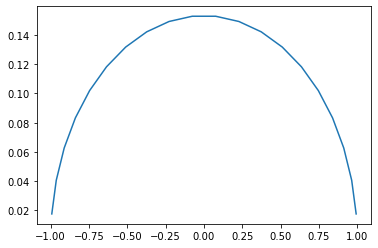

In [32]:
plt.plot(pontos,pesos)
plt.autoscale;

### Tabela de pesos/pontos - Quadratura de Gauss-Legendre

Para gerarmos uma tabela de pontos e pesos, basta fazer:

In [7]:
# número máximo de pontos
N = 16

for i in range(1,N+1):
    (pontos,pesos) = leg.leggauss(i)       
    print('REGRA DE {0} PONTO(S):\n-> Pontos:'.format(i))
    print(pontos)
    print('-> Pesos:')
    print(pesos)
    print('\n')

REGRA DE 1 PONTO(S):
-> Pontos:
[0.]
-> Pesos:
[2.]


REGRA DE 2 PONTO(S):
-> Pontos:
[-0.57735027  0.57735027]
-> Pesos:
[1. 1.]


REGRA DE 3 PONTO(S):
-> Pontos:
[-0.77459667  0.          0.77459667]
-> Pesos:
[0.55555556 0.88888889 0.55555556]


REGRA DE 4 PONTO(S):
-> Pontos:
[-0.86113631 -0.33998104  0.33998104  0.86113631]
-> Pesos:
[0.34785485 0.65214515 0.65214515 0.34785485]


REGRA DE 5 PONTO(S):
-> Pontos:
[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
-> Pesos:
[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


REGRA DE 6 PONTO(S):
-> Pontos:
[-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
-> Pesos:
[0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]


REGRA DE 7 PONTO(S):
-> Pontos:
[-0.94910791 -0.74153119 -0.40584515  0.          0.40584515  0.74153119
  0.94910791]
-> Pesos:
[0.12948497 0.27970539 0.38183005 0.41795918 0.38183005 0.27970539
 0.12948497]


REGRA DE 8 PONTO(S):
-> Pontos:
[-0.96028986 -0.796

A partir daí, podemos organizar uma tabela para a regra de até 8 pontos/pesos como segue:

In [12]:
# número máximo de pontos
N = 8

header='| Regra | nó(s) | peso(s) |\n|---|---|---|'
print(header)
for i in range(1,N+1):
    (pontos,pesos) = leg.leggauss(i)       
    p = ', '.join([str(p) for p in pontos])
    w = ', '.join([str(p) for p in pesos])    
    row = '|' + str(i) + '|' + p + '|' + w + '|'
    print(row)                   

| Regra | nó(s) | peso(s) |
|---|---|---|
|1|0.0|2.0|
|2|-0.5773502691896257, 0.5773502691896257|1.0, 1.0|
|3|-0.7745966692414834, 0.0, 0.7745966692414834|0.5555555555555557, 0.8888888888888888, 0.5555555555555557|
|4|-0.8611363115940526, -0.33998104358485626, 0.33998104358485626, 0.8611363115940526|0.3478548451374537, 0.6521451548625462, 0.6521451548625462, 0.3478548451374537|
|5|-0.906179845938664, -0.5384693101056831, 0.0, 0.5384693101056831, 0.906179845938664|0.23692688505618942, 0.4786286704993662, 0.568888888888889, 0.4786286704993662, 0.23692688505618942|
|6|-0.932469514203152, -0.6612093864662645, -0.23861918608319693, 0.23861918608319693, 0.6612093864662645, 0.932469514203152|0.17132449237916975, 0.36076157304813894, 0.46791393457269137, 0.46791393457269137, 0.36076157304813894, 0.17132449237916975|
|7|-0.9491079123427585, -0.7415311855993945, -0.4058451513773972, 0.0, 0.4058451513773972, 0.7415311855993945, 0.9491079123427585|0.12948496616887065, 0.2797053914892766, 0.3818300

#### Tabela de quadratura de Gauss-Legendre 
| Regra | nó(s) | peso(s) |
|---|---|---|
|1|0.0|2.0|
|2|-0.57735026919, 0.57735026919|1.0, 1.0|
|3|-0.774596669241, 0.0, 0.774596669241|0.555555555556, 0.888888888889, 0.555555555556|
|4|-0.861136311594, -0.339981043585, 0.339981043585, 0.861136311594|0.347854845137, 0.652145154863, 0.652145154863, 0.347854845137|
|5|-0.906179845939, -0.538469310106, 0.0, 0.538469310106, 0.906179845939|0.236926885056, 0.478628670499, 0.568888888889, 0.478628670499, 0.236926885056|
|6|-0.932469514203, -0.661209386466, -0.238619186083, 0.238619186083, 0.661209386466, 0.932469514203|0.171324492379, 0.360761573048, 0.467913934573, 0.467913934573, 0.360761573048, 0.171324492379|
|7|-0.949107912343, -0.741531185599, -0.405845151377, 0.0, 0.405845151377, 0.741531185599, 0.949107912343|0.129484966169, 0.279705391489, 0.381830050505, 0.417959183673, 0.381830050505, 0.279705391489, 0.129484966169|
|8|-0.960289856498, -0.796666477414, -0.525532409916, -0.183434642496, 0.183434642496, 0.525532409916, 0.796666477414, 0.960289856498|0.10122853629, 0.222381034453, 0.313706645878, 0.362683783378, 0.362683783378, 0.313706645878, 0.222381034453, 0.10122853629|

## Transformação de variáveis

Uma integral $\int_a^b f(x) \, dx$ sobre $[a,b]$ arbitrário ser transformada em uma integral em $[-1,1]$ utilizando a mudança de variáveis:

$$t = \dfrac{2x - a - b}{b - a} \Rightarrow x = \dfrac{1}{2}[(b-a)t + a + b]$$

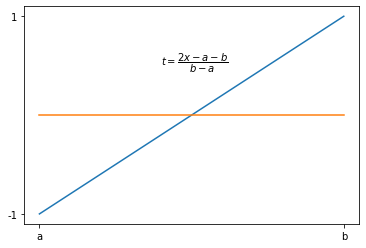

In [9]:
x = np.linspace(2,4)
y = x - 3
plt.plot(x,y);
plt.plot(x,x*0);
plt.xticks([2,4],['a','b']);
plt.yticks([-1,1],['-1','1']);
plt.annotate('$t = \dfrac{2x - a - b}{b - a}$',(2.8,0.5));


### Tarefa 

Defina uma função como a seguinte que retorne `output`, tal que `type(output)` seja `str`. 
```python
def print_gauss_legendre_table(N):
    header='| Regra | nó(s) | peso(s) |\n|---|---|---|'
    print(header)
    for i in range(1,N+1):
        (pontos,pesos) = leg.leggauss(i)       
        p = ', '.join([str(p) for p in pontos])
        w = ', '.join([str(p) for p in pesos])    
        row = '|' + str(i) + '|' + p + '|' + w + '|'
        print(row)             
```

Então, reimprima a tabela para 8 pesos/pontos anterior com o código. 

```
output = print_gauss_legendre_table(8)
```

Em seguida, use o código abaixo para converter a saída da célula de código do Jupyter diretamente para Markdown. 
```python
from IPython.display import display, Markdown
display(Markdown(output))
```

Por último, incorpore esta funcionalidade em `print_gauss_legendre_table(N)`, para `N` dado.

| Regra | nó(s) | peso(s) |
|---|---|---|
|1|0.0|2.0|
|2|-0.57735026919, 0.57735026919|1.0, 1.0|
|3|-0.774596669241, 0.0, 0.774596669241|0.555555555556, 0.888888888889, 0.555555555556|
|4|-0.861136311594, -0.339981043585, 0.339981043585, 0.861136311594|0.347854845137, 0.652145154863, 0.652145154863, 0.347854845137|
|5|-0.906179845939, -0.538469310106, 0.0, 0.538469310106, 0.906179845939|0.236926885056, 0.478628670499, 0.568888888889, 0.478628670499, 0.236926885056|
|6|-0.932469514203, -0.661209386466, -0.238619186083, 0.238619186083, 0.661209386466, 0.932469514203|0.171324492379, 0.360761573048, 0.467913934573, 0.467913934573, 0.360761573048, 0.171324492379|
|7|-0.949107912343, -0.741531185599, -0.405845151377, 0.0, 0.405845151377, 0.741531185599, 0.949107912343|0.129484966169, 0.279705391489, 0.381830050505, 0.417959183673, 0.381830050505, 0.279705391489, 0.129484966169|
|8|-0.960289856498, -0.796666477414, -0.525532409916, -0.183434642496, 0.183434642496, 0.525532409916, 0.796666477414, 0.960289856498|0.10122853629, 0.222381034453, 0.313706645878, 0.362683783378, 0.362683783378, 0.313706645878, 0.222381034453, 0.10122853629|
|9|-0.968160239508, -0.836031107327, -0.613371432701, -0.324253423404, 0.0, 0.324253423404, 0.613371432701, 0.836031107327, 0.968160239508|0.0812743883616, 0.180648160695, 0.260610696403, 0.31234707704, 0.330239355001, 0.31234707704, 0.260610696403, 0.180648160695, 0.0812743883616|
|10|-0.973906528517, -0.865063366689, -0.679409568299, -0.433395394129, -0.148874338982, 0.148874338982, 0.433395394129, 0.679409568299, 0.865063366689, 0.973906528517|0.0666713443087, 0.149451349151, 0.219086362516, 0.26926671931, 0.295524224715, 0.295524224715, 0.26926671931, 0.219086362516, 0.149451349151, 0.0666713443087|
|11|-0.978228658146, -0.887062599768, -0.730152005574, -0.519096129207, -0.269543155952, 0.0, 0.269543155952, 0.519096129207, 0.730152005574, 0.887062599768, 0.978228658146|0.0556685671162, 0.125580369465, 0.186290210928, 0.233193764592, 0.26280454451, 0.272925086778, 0.26280454451, 0.233193764592, 0.186290210928, 0.125580369465, 0.0556685671162|
|12|-0.981560634247, -0.90411725637, -0.769902674194, -0.587317954287, -0.367831498998, -0.125233408511, 0.125233408511, 0.367831498998, 0.587317954287, 0.769902674194, 0.90411725637, 0.981560634247|0.0471753363865, 0.106939325995, 0.160078328543, 0.203167426723, 0.233492536538, 0.249147045813, 0.249147045813, 0.233492536538, 0.203167426723, 0.160078328543, 0.106939325995, 0.0471753363865|